In [1]:
import tensorflow as tf

# Check if GPU is available
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

# Configure TensorFlow to use the GPU
gpus = tf.config.experimental.list_physical_devices('GPU')


if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

GPU found
1 Physical GPUs, 1 Logical GPUs


In [2]:
# %pip install transformers

In [3]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from transformers import AutoImageProcessor, TFViTModel
from tensorflow.keras.layers import GlobalAveragePooling2D, Input, Dense,Flatten


# Load the dataset directory path
# data_dir = "M:/Datasets/aloi_ill/png"  # Update this to your dataset path
data_dir = "M:\SIFT\small_data"  # Update this to your dataset path

image_paths = []
labels = []

# Load images and assign labels based on folder names
for label in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, label)
    if os.path.isdir(class_dir):
        for file in os.listdir(class_dir):
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(class_dir, file))
                labels.append(int(label))  # Convert folder name to integer label



print(image_paths)
print(len(labels))

print(len(image_paths))






c:\Users\CSE-AiD\anaconda3\envs\py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['M:\\SIFT\\small_data\\1\\1_l1c1.png', 'M:\\SIFT\\small_data\\1\\1_l1c2.png', 'M:\\SIFT\\small_data\\1\\1_l1c3.png', 'M:\\SIFT\\small_data\\1\\1_l2c1.png', 'M:\\SIFT\\small_data\\1\\1_l2c2.png', 'M:\\SIFT\\small_data\\1\\1_l2c3.png', 'M:\\SIFT\\small_data\\1\\1_l3c1.png', 'M:\\SIFT\\small_data\\1\\1_l3c2.png', 'M:\\SIFT\\small_data\\1\\1_l3c3.png', 'M:\\SIFT\\small_data\\1\\1_l4c1.png', 'M:\\SIFT\\small_data\\1\\1_l4c2.png', 'M:\\SIFT\\small_data\\1\\1_l4c3.png', 'M:\\SIFT\\small_data\\1\\1_l5c1.png', 'M:\\SIFT\\small_data\\1\\1_l5c2.png', 'M:\\SIFT\\small_data\\1\\1_l5c3.png', 'M:\\SIFT\\small_data\\1\\1_l6c1.png', 'M:\\SIFT\\small_data\\1\\1_l6c2.png', 'M:\\SIFT\\small_data\\1\\1_l6c3.png', 'M:\\SIFT\\small_data\\1\\1_l7c1.png', 'M:\\SIFT\\small_data\\1\\1_l7c2.png', 'M:\\SIFT\\small_data\\1\\1_l7c3.png', 'M:\\SIFT\\small_data\\1\\1_l8c1.png', 'M:\\SIFT\\small_data\\1\\1_l8c2.png', 'M:\\SIFT\\small_data\\1\\1_l8c3.png', 'M:\\SIFT\\small_data\\10\\10_l1c1.png', 'M:\\SIFT\\small_data\

In [4]:
# Step 1: Load EfficientNet model
base_model = TFViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
# model = TFViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
base_model.trainable = False
# print(base_model.summary())
inputs=Input(shape=(3,224, 224), name='pixel_values', dtype='float32')
output=base_model(inputs).last_hidden_state
model = Model(inputs=inputs,outputs=output)


All PyTorch model weights were used when initializing TFViTModel.

All the weights of TFViTModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


In [5]:
image_paths

['M:\\SIFT\\small_data\\1\\1_l1c1.png',
 'M:\\SIFT\\small_data\\1\\1_l1c2.png',
 'M:\\SIFT\\small_data\\1\\1_l1c3.png',
 'M:\\SIFT\\small_data\\1\\1_l2c1.png',
 'M:\\SIFT\\small_data\\1\\1_l2c2.png',
 'M:\\SIFT\\small_data\\1\\1_l2c3.png',
 'M:\\SIFT\\small_data\\1\\1_l3c1.png',
 'M:\\SIFT\\small_data\\1\\1_l3c2.png',
 'M:\\SIFT\\small_data\\1\\1_l3c3.png',
 'M:\\SIFT\\small_data\\1\\1_l4c1.png',
 'M:\\SIFT\\small_data\\1\\1_l4c2.png',
 'M:\\SIFT\\small_data\\1\\1_l4c3.png',
 'M:\\SIFT\\small_data\\1\\1_l5c1.png',
 'M:\\SIFT\\small_data\\1\\1_l5c2.png',
 'M:\\SIFT\\small_data\\1\\1_l5c3.png',
 'M:\\SIFT\\small_data\\1\\1_l6c1.png',
 'M:\\SIFT\\small_data\\1\\1_l6c2.png',
 'M:\\SIFT\\small_data\\1\\1_l6c3.png',
 'M:\\SIFT\\small_data\\1\\1_l7c1.png',
 'M:\\SIFT\\small_data\\1\\1_l7c2.png',
 'M:\\SIFT\\small_data\\1\\1_l7c3.png',
 'M:\\SIFT\\small_data\\1\\1_l8c1.png',
 'M:\\SIFT\\small_data\\1\\1_l8c2.png',
 'M:\\SIFT\\small_data\\1\\1_l8c3.png',
 'M:\\SIFT\\small_data\\10\\10_l1c1.png'

In [6]:

img1=cv2.imread(image_paths[0])
img1 = cv2.resize(img1, (224, 224))  # Resize to EfficientNet input size
img1 = np.transpose(img1, (2, 0, 1))  # Transpose the image to shape (3, 224, 224)
img1 = preprocess_input(img1)  # Preprocess the image
img1 = np.expand_dims(img1, axis=0)  # Add batch dimension



In [7]:
feature = model(img1)  # Extract features
feature = Flatten()(feature)
print(feature.shape)

(1, 151296)


In [8]:
# Step 2: Preprocess images and extract features
def extract_features(image_paths):
    features = []
    for image_path in image_paths:
        img = cv2.imread(image_path)
        # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        print(img.shape)
        img = cv2.resize(img, (224, 224))  # Resize to EfficientNet input size
        img = np.transpose(img, (2, 0, 1))  # Transpose the image to shape (3, 224, 224)
        img = preprocess_input(img)  # Preprocess the image
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        feature = model(img)  # Extract features
        #flatten the features
        features.append( Flatten()(feature))
    return np.array(features)

# Extract features for all images
combined_features = extract_features(image_paths)
#adjust combined features to 2D

labels = np.array(labels)

(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 768, 3)
(576, 

In [9]:
combined_features = np.squeeze(combined_features)

In [10]:
combined_features.shape, labels.shape

((720, 151296), (720,))

In [11]:
# Step 3: Train and test classifier
X_train, X_val, y_train, y_val = train_test_split(combined_features, labels, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [ ]:
print(X_train[0])
print(y_train[0])

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

[ 0.01559409 -0.07655284 -0.02655793 ... -0.13242705  0.23766772
  0.06448834]
24
(576, 151296)


NameError: name 'X_test' is not defined

In [13]:
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality
pca = PCA(n_components=700)  # You can adjust the number of components as needed
reduced_features = pca.fit_transform(combined_features)

print("Original shape:", combined_features.shape)
print("Reduced shape:", reduced_features.shape)

Original shape: (720, 151296)
Reduced shape: (720, 700)


In [15]:
import numpy as np

# Count frequency of numbers in y_train
unique_train, counts_train = np.unique(y_train, return_counts=True)
frequency_train = dict(zip(unique_train, counts_train))

# Count frequency of numbers in y_test
unique_test, counts_test = np.unique(y_val, return_counts=True)
frequency_test = dict(zip(unique_test, counts_test))

print("Frequency in y_train:", frequency_train)
print("Frequency in y_test:", frequency_test)

Frequency in y_train: {1: 21, 2: 24, 3: 19, 4: 17, 5: 22, 6: 22, 7: 18, 8: 21, 9: 18, 10: 19, 11: 16, 12: 16, 13: 20, 14: 18, 15: 19, 16: 22, 17: 15, 18: 18, 19: 20, 20: 16, 21: 19, 22: 15, 23: 19, 24: 20, 25: 19, 26: 19, 27: 21, 28: 21, 29: 21, 30: 21}
Frequency in y_test: {1: 3, 3: 5, 4: 7, 5: 2, 6: 2, 7: 6, 8: 3, 9: 6, 10: 5, 11: 8, 12: 8, 13: 4, 14: 6, 15: 5, 16: 2, 17: 9, 18: 6, 19: 4, 20: 8, 21: 5, 22: 9, 23: 5, 24: 4, 25: 5, 26: 5, 27: 3, 28: 3, 29: 3, 30: 3}


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Reshape the data to fit LSTM input requirements
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_lstm = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_val)

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(y_train_cat.shape[1], activation='softmax'))

# Compile the model
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_lstm.fit(X_train_lstm, y_train_cat, epochs=40, batch_size=5, validation_data=(X_val_lstm, y_val_cat), verbose=2)

# Evaluate the model
loss, accuracy = model_lstm.evaluate(X_test_lstm, y_test_cat, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')




Epoch 1/40
116/116 - 6s - loss: 3.4983 - accuracy: 0.0521 - val_loss: 3.4088 - val_accuracy: 0.0347 - 6s/epoch - 53ms/step
Epoch 2/40
116/116 - 5s - loss: 3.3369 - accuracy: 0.0694 - val_loss: 3.3700 - val_accuracy: 0.0903 - 5s/epoch - 41ms/step
Epoch 3/40
116/116 - 5s - loss: 3.2525 - accuracy: 0.0972 - val_loss: 3.2423 - val_accuracy: 0.1181 - 5s/epoch - 41ms/step
Epoch 4/40
116/116 - 5s - loss: 3.1656 - accuracy: 0.1562 - val_loss: 3.1805 - val_accuracy: 0.0556 - 5s/epoch - 41ms/step
Epoch 5/40
116/116 - 5s - loss: 3.1124 - accuracy: 0.1198 - val_loss: 3.0801 - val_accuracy: 0.1736 - 5s/epoch - 43ms/step
Epoch 6/40
116/116 - 5s - loss: 3.0193 - accuracy: 0.2448 - val_loss: 2.9987 - val_accuracy: 0.1389 - 5s/epoch - 44ms/step
Epoch 7/40
116/116 - 5s - loss: 2.9441 - accuracy: 0.2049 - val_loss: 2.9361 - val_accuracy: 0.2639 - 5s/epoch - 42ms/step
Epoch 8/40
116/116 - 5s - loss: 2.8683 - accuracy: 0.3108 - val_loss: 2.8650 - val_accuracy: 0.3889 - 5s/epoch - 42ms/step
Epoch 9/40
116/1

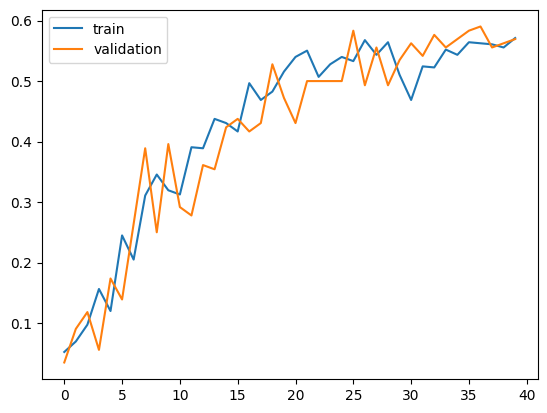

In [22]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [33]:
import random

# Select 20 random indices
random_indices = random.sample(range(len(y_test)), 20)

# Print y_test and y_pred side by side for the selected indices
comparison = np.column_stack((y_test[random_indices], y_pred[random_indices]))
print(comparison)

[[402 402]
 [669 669]
 [603 603]
 [693 693]
 [958 958]
 [ 19  19]
 [ 96  96]
 [492 492]
 [232 232]
 [468 468]
 [395 395]
 [ 16  16]
 [429 429]
 [888 888]
 [411 411]
 [909 909]
 [376 376]
 [701 701]
 [841 841]
 [547 547]]


In [34]:
print(y_pred[1], y_test[1],labels[1])

8 8 1
